In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

<h1> Small elastic colision simulation on a plinko like game </h1>

<h2> Formulae </h2>

<p> The colision use the perfect elastic colision formulae $$ v'_1 =v_1 - \frac{2m_2}{m_1+m_2} \frac{v_1 -v_2,x_1 -x_2}{||x_1-x_2||^2} (x_1 -x_2) $$
    $$ v'_2 =v_2 - \frac{2m_1}{m_1+m_2} \frac{v_2 -v_1,x_2 -x_1}{||x_2-x_1||^2} (x_2 -x_1) $$</p>
<p> Aproximated for $m2 \rightarrow +\infty $
    $$ v'_1 =v_1 - 2 \frac{v_1 -v_2,x_1 -x_2}{||x_1-x_2||^2} (x_1 -x_2) $$
    $$ v'_2 =0 $$ </p>
<p> where $v_1$ is the ball velocity and $v_2$ is the pin velocity </p>
<p> The velocity is also modified by a kinetic energy dissipation factor after each colision </p>

In [7]:
#gravity acceleration
g=-10


class ball:
    def __init__(self,x,dt,matrix,dist, dissipation):
        #ball position
        self.pos=np.array([x,1.25])
        #ball velocity
        self.v=np.array([0.,0.])
        #time step
        self.dt=dt
        #pin center matrix
        self.matrix=matrix
        #distance between centers where a colision happens
        self.dist=dist
        #kinetic energy dissipation factor
        self.coef=(1-dissipation)**2
        #array with colided pin centers 
        self.colM=np.array([])
    
    #time step
    def time(self):
        #velocity change due tue gravity acceleration
        self.v[1]+=g*self.dt
        lastp=self.pos
        lastv=self.v
        #position change 
        self.pos+=self.v*self.dt
        #colision
        self.colision(lastp,lastv)
        
        
    def colision(self,lastp,lastv):
        #distance calculation between centers
        calcM=np.sqrt(((self.matrix[:,0]-self.pos[0])**2)+((self.matrix[:,1]-self.pos[1])**2))
        
        #wall colision
        if self.pos[0]<0 or self.pos[0]>1 :
            self.v=lastv*np.array([-1,1])
            self.pos=lastp+self.v*self.dt
            
        elif self.pos[1]<0:
            self.v=lastv*np.array([1,-1])*0.01
            self.pos=lastp+self.v*self.dt
        
        #pin colision
        else:
            for i in range(len(calcM)):
                #colision verification
                if calcM[i]<=self.dist:
                    #application of perfect elastic colision aproximation
                    self.v=lastv-2*(lastp-self.matrix[i,:])*(np.dot(lastv,lastp-self.matrix[i,:]))/(np.dot(lastp-self.matrix[i,:],lastp-self.matrix[i,:]))
                    self.pos=lastp+self.v*self.dt 
                    #Trying to avoid multiple colisions with one pin
                    while (np.sqrt(((self.matrix[i,0]-self.pos[0])**2)+((self.matrix[i,1]-self.pos[1])**2))<self.dist*1.25):
                        self.pos=self.pos+self.v*self.dt 
                    
                    #dissipation
                    self.v*=np.sqrt(self.coef)
                    #adition of colided pins to the colision matrix
                    if len(self.colM)>0:
                        self.colM=np.vstack((self.colM,self.matrix[i,:]))
                    else:
                        self.colM=self.matrix[i,:]
                    
                    
        
        
                
                

                
                
        
        
        
        
        
        
        

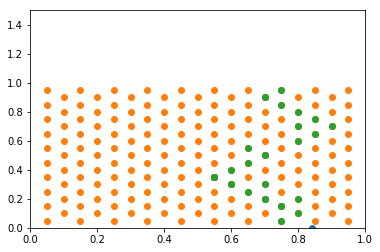

In [11]:
dt=0.0001

#creation of point grid
a=np.arange(0.1,1,0.1)
b=np.arange(0.1,1,0.1)
aa,bb =np.meshgrid(a,b)
a2=np.arange(0.05,1,0.1)
b2=np.arange(0.05,1,0.1)
aa2,bb2 =np.meshgrid(a2,b2)
cc=np.column_stack((np.hstack((bb.flatten(),bb2.flatten())),np.hstack((aa.flatten(),aa2.flatten()))))

#Ball object
game=ball(0.712,dt,cc,0.025,0.5)


# initial drawing
fig, ax = plt.subplots()
scat=ax.scatter(cc[:,0],cc[:,1])
scat2=ax.scatter(cc[:,0],cc[:,1])
scat3=ax.scatter([],[])



def start():
    ax.axis([0,1,0,1.5])
    scat.set_offsets([cc[:,0],cc[:,1]])
    return scat,
    
#animation
def update(frame):
    #draw 1 of each 100 time steps
    for i in range (100):
        game.time()
    #draw ball position
    scat.set_offsets([game.pos[0],game.pos[1]])
    #draw colision matrix
    if len(game.colM)>1:
        if game.colM.ndim>1:
            scat3.set_offsets(game.colM)
        else:
            scat3.set_offsets(game.colM)
            
    return scat,

ani= FuncAnimation(fig, update, 500,init_func=start, blit=True, interval=20)
HTML(ani.to_html5_video())
    

    